# Trabajo Final
__Curso:__ Aprendizaje Automático 2020 

__Programa:__ DIA/MIA

__Profesor:__ Gonzalo Ruz

__Ayudante:__ Anthony Cho

## Instrucciones
* La tarea es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo TrabajoFinal_Beto_Acosta.ipynb
* Subir el archivo al link de entrega Trabajo en webcursos que será habilitado
* __Fecha de entrega:__ lunes 31 de agosto, 23:55 hrs.

Los datos bankData.csv corresponden a una campaña de marketing dirigido (por teléfono) de un banco portugués. El objetivo de clasificación es poder predecir si el cliente va a tomar o no un depósito a plazo (variable “y” ubicada en la última columna de la tabla) en función de un conjunto de 18 atributos descritos en el archivo Atributos.pdf. Cargue el conjunto de datos (bankData.csv) al Google Drive en la carpeta Data y luego cargue en este notebook y responda las preguntas.

<font color='#3f68bf' size='5'><b>Aprendizaje Automático - Universidad Adolfo Ibañez</b></font>

Profesor: **Gonzalo Ruz**

Alumnos:

  1. **Angélica Leiva**
  2. **Jorge Navarro**
  3. **Erick Villarroel**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Data/bankData.csv')

## Pregunta 1
Omita la variable “y”, luego determine un número apropiado de clusters usando k-means para este dataset. Para k-means con k igual al valor encontrado, entregue el perfil del cliente tipo para cada cluster.  

### **Respuesta:**

Se importan las librerias a utilizar



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

Se revisan los datos:




In [4]:
data.describe(include="all")

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1264,3315,2175,3349,2652,1378,860,NaN,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.788055,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.703736,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [5]:
data.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Se revisa la forma de la tabla:

In [6]:
data.shape

(4119, 19)

Se omite la última columna con la variable "y":

In [7]:
# Eliminar última columna
dt=data.iloc[:, 0:18] 
dt.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


Solo se utlizan los atributos continuos:

In [8]:
X=dt[['age','duration','pdays', 'previous', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
X.head(5)

,age,duration,pdays,previous,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,487,999,0,2,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,999,0,4,1.1,93.994,-36.4,4.855,5191.0
2,25,227,999,0,1,1.4,94.465,-41.8,4.962,5228.1
3,38,17,999,0,3,1.4,94.465,-41.8,4.959,5228.1
4,47,58,999,0,1,-0.1,93.200,-42.0,4.191,5195.8


Se estandarizan los atributos

In [9]:
# Se estandarizan los datos para que tengan media 0 y varianza 1
X_std = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)
X_std.head(5)

,age,duration,pdays,previous,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.980752,0.903952,0.201031,-0.351356,-0.209228,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779
1,-0.107991,0.350300,0.201031,-0.351356,0.569634,0.649441,0.715193,0.892269,0.711698,0.332862
2,-1.465619,-0.116966,0.201031,-0.351356,-0.598660,0.841389,1.528273,-0.283172,0.773427,0.836535
3,-0.204965,-0.941553,0.201031,-0.351356,0.180203,0.841389,1.528273,-0.283172,0.771697,0.836535
4,0.667795,-0.780563,0.201031,-0.351356,-0.598660,-0.118350,-0.655478,-0.326707,0.328632,0.398028


Se revisa cual es el valor optimo de K:

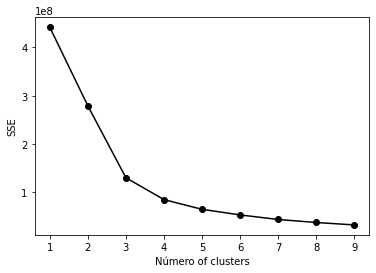

In [10]:
#la suma del error cuadrático para diferentes valores de k
SSE = []
for i in range(1, 10):
  km = KMeans(n_clusters=i)
  km.fit(X)
  SSE.append(km.inertia_)

# se grafica
plt.plot(range(1, 10), SSE,'-o', color='black')
plt.xlabel('Número of clusters')
plt.ylabel('SSE')
plt.show()

Del gráfico, se desprende que k=3 es el valor apropiado

In [11]:
kmeans = KMeans(n_clusters=2)
kfit = kmeans.fit(X_std)
identified_clusters2 = kfit.predict(X_std)
print(kfit.cluster_centers_,'\n')
print(identified_clusters2,'\n')

kmeans = KMeans(n_clusters=3)
kfit = kmeans.fit(X_std)
identified_clusters3 = kfit.predict(X_std)
print(kfit.cluster_centers_,'\n')
print(identified_clusters3,'\n')

kmeans = KMeans(n_clusters=4)
kfit = kmeans.fit(X_std)
identified_clusters4 = kfit.predict(X_std)
print(kfit.cluster_centers_,'\n')
print(identified_clusters4,'\n')

kmeans = KMeans(n_clusters=5)
kfit = kmeans.fit(X_std)
identified_clusters5 = kfit.predict(X_std)
print(kfit.cluster_centers_,'\n')
print(identified_clusters5,'\n')

[[-0.00387637 -0.0227827   0.20103134 -0.30070861  0.09992669  0.65512356
   0.44036613  0.2225002   0.68730689  0.63760091]
 [ 0.00795964  0.04678138 -0.41279229  0.61746691 -0.20518675 -1.34521293
  -0.90423586 -0.45687588 -1.41129732 -1.30923241]] 

[1 0 0 ... 1 0 0] 

[[-3.87637477e-03 -2.27827016e-02  2.01031335e-01 -3.00708613e-01
   9.99266864e-02  6.55123555e-01  4.40366130e-01  2.22500201e-01
   6.87306890e-01  6.37600909e-01]
 [-2.11655200e-02  1.98853784e-02  2.01031335e-01  2.85773996e-01
  -1.94111125e-01 -1.34600615e+00 -9.92001690e-01 -5.83948389e-01
  -1.39856906e+00 -1.22581937e+00]
 [ 2.18406703e-01  2.41121403e-01 -4.84804226e+00  3.01415044e+00
  -2.85214868e-01 -1.33948146e+00 -2.70074250e-01  4.61300515e-01
  -1.50326677e+00 -1.91194246e+00]] 

[1 0 0 ... 1 0 0] 

[[-5.19818199e-03  1.81157960e-03  2.01031335e-01 -2.97401481e-01
  -1.54744338e-01  6.45177500e-01  4.27129018e-01  2.21134943e-01
   6.82705779e-01  6.31301892e-01]
 [-2.05188650e-02  2.06841389e-02  2

Se visualiza utilizando PCA:

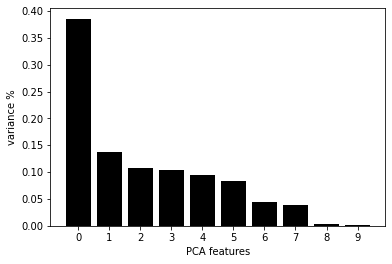

In [12]:
# Crear una instancia PCA: pca
pca = PCA()
principalComponents = pca.fit_transform(X_std)

# Graficar el porcetanje de la varianza que es explicada por cada componente
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Guardar las componentes en un dataframe
PCA_components = pd.DataFrame(principalComponents)

Se utilizan los 2 principales componentes para proyectar los datos en 2D

<Figure size 432x288 with 0 Axes>

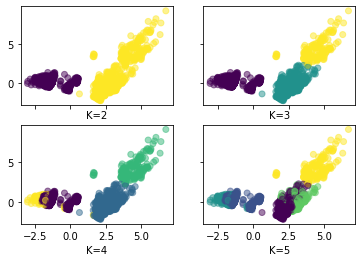

In [13]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)

sc = axes[0][0].scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=identified_clusters2)
axes[0][0].set_xlabel('K=2', labelpad = 5)

#legend1 = axes[0][0].legend(*scatter.legend_elements(),
#                    loc="upper right", title="Clusters")
#axes[0][0].add_artist(legend1)

axes[0][1].scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=identified_clusters3)
axes[0][1].set_xlabel('K=3', labelpad = 5)

axes[1][0].scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=identified_clusters4)
axes[1][0].set_xlabel('K=4')

axes[1][1].scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=identified_clusters5)
axes[1][1].set_xlabel('K=5')

plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.labelsize"] = 14

plt.show()
plt.rcParams['figure.figsize'] = (12,12)

Se utiliza K-means con k=3

Se agregan las etiquetas al dataset original para caracterizar cada cluster

In [14]:
data_clusterizada= data.copy()
data_clusterizada['Cluster'] = identified_clusters3
data_clusterizada.head(5)

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Cluster
0,30,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1
1,39,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


**Análisis Perfil del Cliente para cada tipo de Cluster**

In [15]:
# Genera Rangos de Edad
cortes = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
data_clusterizada['rango_edad'] = pd.cut(data_clusterizada.age, cortes, labels = labels,include_lowest = True)

In [16]:
# Tablas de Frecuencia

print('Cluster / Rango de Edad')
print(data_clusterizada.groupby(['Cluster','rango_edad']).size(),'\n')
print(pd.crosstab(data_clusterizada['Cluster'],data_clusterizada['rango_edad']).apply(lambda r: round((r/r.sum())*100,1), axis=1).to_string(),'\n')
print('=' * 150 + '\n')

# Iterando en cada columna
for col in data_clusterizada.columns: 
    print('Cluster / ' + col)
    print(data_clusterizada.groupby(['Cluster',col]).size(),'\n')
    print(pd.crosstab(data_clusterizada['Cluster'],data_clusterizada[col]).apply(lambda r: round((r/r.sum())*100,1), axis=1).to_string(),'\n')
    print('=' * 150 + '\n')


Cluster / Rango de Edad
Cluster  rango_edad
0        18-29          433
         30-39         1119
         40-49          739
         50-59          479
         60-69            0
         70+              0
1        18-29          260
         30-39          440
         40-49          262
         50-59          160
         60-69           35
         70+             28
2        18-29           35
         30-39           55
         40-49           29
         50-59           29
         60-69            7
         70+              9
dtype: int64 

rango_edad  18-29  30-39  40-49  50-59  60-69  70+
Cluster                                           
0            15.6   40.4   26.7   17.3    0.0  0.0
1            21.9   37.1   22.1   13.5    3.0  2.4
2            21.3   33.5   17.7   17.7    4.3  5.5 


Cluster / age
Cluster  age
0        21      1
         22      7
         23      8
         24     30
         25     34
                ..
2        77      1
         78      1


<font color='#3f68bf' size='4'><b>Perfil del cliente tipo para cada cluster.</b></font>

<font color='#3f68bf' size='4'><b>Cluster 0:</b></font>

  * Tiene entre 18 y 39 años
  * Tiene estudios formales superior a secundaria
  * El 98% tiene crédito en mora
  * El 58% tiene un crédito hipotecario
  * No tienen créditos personales (82%)
  * Al 81% lo han contactado hace menos de 10 días
  * Los han contactado entre 1 y 4 veces
  * el 86% tuvo un resultado exitoso en la campaña de marketing anterior


<font color='#3f68bf' size='4'><b>Cluster 1:</b></font>

  * Tiene entre 30 y 49 años
  * Tiene estudios formales superior a secundaria
  * El 76% tiene crédito en mora
  * El 50% tiene un crédito hipotecario
  * No tienen créditos personales (81%)
  * No ha sido contactado antes

<font color='#3f68bf' size='4'><b>Cluster 2:</b></font>

  * Tiene entre 30 y 49 años
  * Tiene estudios formales superior a secundaria
  * El 88% tiene crédito en mora
  * El 56% tiene un crédito hipotecario
  * No tienen créditos personales (81%)
  * No ha sido contactado antes


## Pregunta 2
Omita la variable “y” nuevamente, corra k-means con k=2. Compare el vector (resultante) de las etiquetas de los clusters y la variable “y”. Señale el % de correspondencia (o aciertos) entre la clase y la etiqueta con los clusters. (Hint, utilice la matriz de confusión para medir el % de aciertos).

### **Respuesta:**

Se corre k-means con k=2:

In [17]:
kmeans = KMeans(n_clusters=2)
kfit = kmeans.fit(X_std)
identified_clusters = kfit.predict(X_std)
print(identified_clusters)

[1 0 0 ... 1 0 0]


Se clusteriza y se convierte a numérica la columna "Y"

In [18]:
# Se clusteriza la data 
data_clusterizada2= data.copy()
data_clusterizada2['Cluster'] = identified_clusters

# Se transforma a numérica la columna "Y"
data_clusterizada2["y"]=np.where(data_clusterizada2["y"]=="no",0,1)

# Se revisa la data
data_clusterizada2.head(5)


,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Cluster
0,30,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,1
1,39,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0
2,25,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,0
3,38,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,0
4,47,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,0


In [19]:
#matriz de confusión

print(confusion_matrix(data_clusterizada2["y"], data_clusterizada2["Cluster"]),'\n')

#Accuracy
# (VP+VN)/(VP+VN+FP+FN)
# Donde:
# VP = Verdaderos Positivos
# VN = Verdaderos Negativos
# FP = Falsos Positivos
# FN = Falsos Positivos

data_clusterizada["y_2"]=np.where(data_clusterizada["y"]=="no","Negativo","Positivo")
data_clusterizada["Cluster_2"]=np.where(data_clusterizada["Cluster"]==0,"Negativo","Positivo")
#data_clusterizada.head(20)

print(pd.crosstab(data_clusterizada['y_2'],data_clusterizada['Cluster_2']),'\n')
print(pd.crosstab(data_clusterizada['y_2'],data_clusterizada['Cluster_2']).apply(lambda r: round((r/r.sum())*100,1), axis=1),'\n')

df_vp = data_clusterizada[data_clusterizada['y_2'].str.contains('Positivo') & data_clusterizada['Cluster_2'].str.contains('Positivo')]
df_vn = data_clusterizada[data_clusterizada['y_2'].str.contains('Negativo') & data_clusterizada['Cluster_2'].str.contains('Negativo')]
df_fp = data_clusterizada[data_clusterizada['y_2'].str.contains('Negativo') & data_clusterizada['Cluster_2'].str.contains('Positivo')]
df_fn = data_clusterizada[data_clusterizada['y_2'].str.contains('Positivo') & data_clusterizada['Cluster_2'].str.contains('Negativo')]
vp = len(df_vp.index)
vn = len(df_vn.index)
fp = len(df_fp.index)
fn = len(df_fn.index)

print('Total = ',len(data_clusterizada.index))
print('Verdaderos Positivos = ',vp)
print('Verdaderos Negativos = ',vn)
print('Falsos Positivos = ',fp)
print('Falsos Negativos = ',fn,'\n')

score = round((vp+vn)/(vp+vn+fp+fn),4)

print ('Score = ',score)

[[2637 1031]
 [ 133  318]] 

Cluster_2  Negativo  Positivo
y_2                          
Negativo       2637      1031
Positivo        133       318 

Cluster_2  Negativo  Positivo
y_2                          
Negativo       71.9      28.1
Positivo       29.5      70.5 

Total =  4119
Verdaderos Positivos =  318
Verdaderos Negativos =  2637
Falsos Positivos =  1031
Falsos Negativos =  133 

Score =  0.7174


</br><font color='#3f68bf' size='4'>
El porcentaje de aciertos entre la clase <b>"y"</b> la etiqueta con los <b>clusters</b> es de un <b>71,74%</b> (2.955 aciertos sobre 4.119)
</font>



## Pregunta 3
Usando `X_train2` (para entrenamiento) y `X_val` (para evaluación), explore una profundidad adecuada para un árbol de decisión tal que no sobreajuste. Luego, entrene un árbol de decisión (con la profundidad determinada previamente) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. Grafique el árbol resultante. Señale qué le cuesta más predecir al clasificador: un cliente que si va a tomar un depósito a plazo o un cliente que no va a tomar un depósito a plazo. Justifique su respuesta.

### Respuesta:

Se convierten los datos categoricos a numéricos:

In [20]:
data["housing"]=np.where(data["housing"]=="yes",0,
                         np.where(data["housing"]=="no",1,2))

data["default"]=np.where(data["default"]=="yes",0,
                         np.where(data["default"]=="no",1,2))

data["loan"]=np.where(data["loan"]=="yes",0,
                         np.where(data["loan"]=="no",1,2))

data["y"]=np.where(data["y"]=="yes",0,1)

data["poutcome"]=np.where(data["poutcome"]=="failure",0,
                         np.where(data["poutcome"]=="nonexistent",1,2)) 

data["contact"]=np.where(data["contact"]=="cellular",0,1)

data["day_of_week"]=np.where(data["day_of_week"]=="mon",0,
                              np.where(data["day_of_week"]=="tue",1,
                                       np.where(data["day_of_week"]=="wed",2,
                                                np.where(data["day_of_week"]=="thu",3,4))))

data["education"]=np.where(data["education"]=="basic.4y",0,
                              np.where(data["education"]=="basic.6y",1,
                                       np.where(data["education"]=="basic.9y",2,
                                                np.where(data["education"]=="high.school",3,
                                                         np.where(data["education"]=="high.school",4,
                                                                  np.where(data["education"]=="illiterate",5,
                                                                           np.where(data["education"]=="professional.course",6,
                                                                                    np.where(data["education"]=="university.degree",7,8))))))))

data["month"]=np.where(data["month"]=="jan",0,
                              np.where(data["month"]=="feb",1,
                                       np.where(data["month"]=="mar",2,
                                                np.where(data["month"]=="apr",3,
                                                         np.where(data["month"]=="may",4,
                                                                  np.where(data["month"]=="jun",5,
                                                                           np.where(data["month"]=="jul",6,
                                                                                    np.where(data["month"]=="aug",7,
                                                                                             np.where(data["month"]=="sep",8,
                                                                                                      np.where(data["month"]=="oct",9,
                                                                                                               np.where(data["month"]=="nov",10,11)))))))))))
                                               

In [41]:
data.head(7)

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,2,1,0,1,0,4,4,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,1
1,39,3,1,1,1,1,4,4,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,1
2,25,3,1,0,1,1,5,2,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,1
3,38,2,1,2,2,1,5,4,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,1
4,47,7,1,0,1,0,10,0,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,1
5,32,7,1,1,1,0,8,3,128,3,999,2,0,-1.1,94.199,-37.5,0.884,4963.6,1
6,32,7,1,0,1,0,8,0,290,4,999,0,1,-1.1,94.199,-37.5,0.879,4963.6,1


In [42]:
#primera partición
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,0:18],data['y'],
    test_size=0.3, random_state=0)

#segunda partición
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train,y_train,
    test_size=0.2, random_state=0)

Definir profundidad de arbol

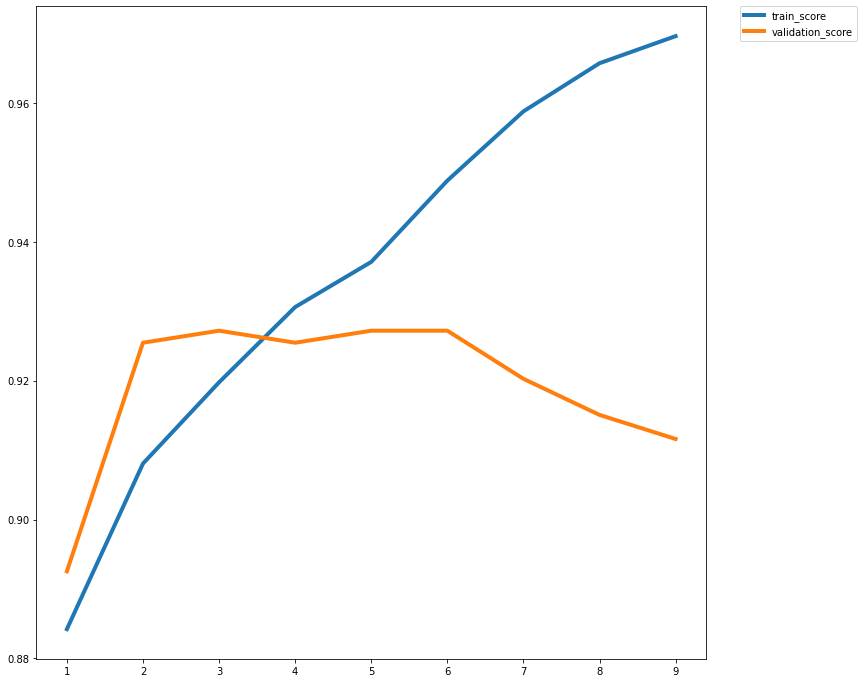

In [43]:
#se revisa el efecto de cambiar la profundidad
train_score, val_score = [],[]
for depth in range(1,10):
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth).fit(X_train2, y_train2)
    train_score.append(tree.score(X_train2, y_train2))
    val_score.append(tree.score(X_val, y_val))
plt.plot(range(1,10), train_score, label="train_score", linewidth=4)
plt.plot(range(1,10), val_score, label="validation_score", linewidth=4)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


Se utilizara una profundidad de árbol de 3

In [44]:
#entrenar el modelo 
model1 = DecisionTreeClassifier(random_state=0,max_depth=3)
model1.fit(X_train, y_train)

#realizar la predicción
predicted = model1.predict(X_test)

#matriz de confusión
print(confusion_matrix(y_test, predicted))

#Accuracy
print("Score: {:.2f}".format(model1.score(X_test, y_test) ))

[[  65   57]
 [  71 1043]]
Score: 0.90


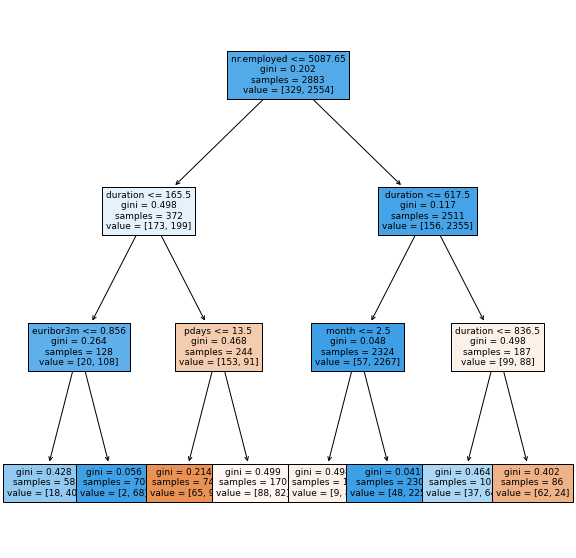

In [45]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
plot_tree(model1, feature_names=X_train.columns, fontsize=9,filled=True)
plt.show()

<br><font color='#3f68bf' size='4'>
Al modelo le cuesta más predecir los clientes que si van a tomar un deposito a plazo, debido a que aprox. el 89% de los datos corresponden a registros de personas que no tomaron un deposito, lo cual tambien se puede ver reflejado en la matriz de confusión donde el 84% de las predicciones corresponden a verdaderos negativos.
</font>

## Pregunta 4
En base al árbol resultante. Cuál es el atributo más importante para este problema de clasificación. Qué atributos no contribuyen (son irrelevantes) para este problema de clasificación.

### Respuesta

Se revisa la relevancia de cada atributo en el modelo:

In [46]:
model1.feature_importances_
# Importancia de los atributos, suma hasta 1
print("Importancia de los atributos:\n{}".format(model1.feature_importances_))

Importancia de los atributos:
[0.         0.         0.         0.         0.         0.
 0.03239333 0.         0.50880585 0.         0.0497842  0.
 0.         0.         0.         0.         0.01868741 0.39032921]


Se revisan graficamente para conocer cual es la contribución de los atributos en la solución del problema:

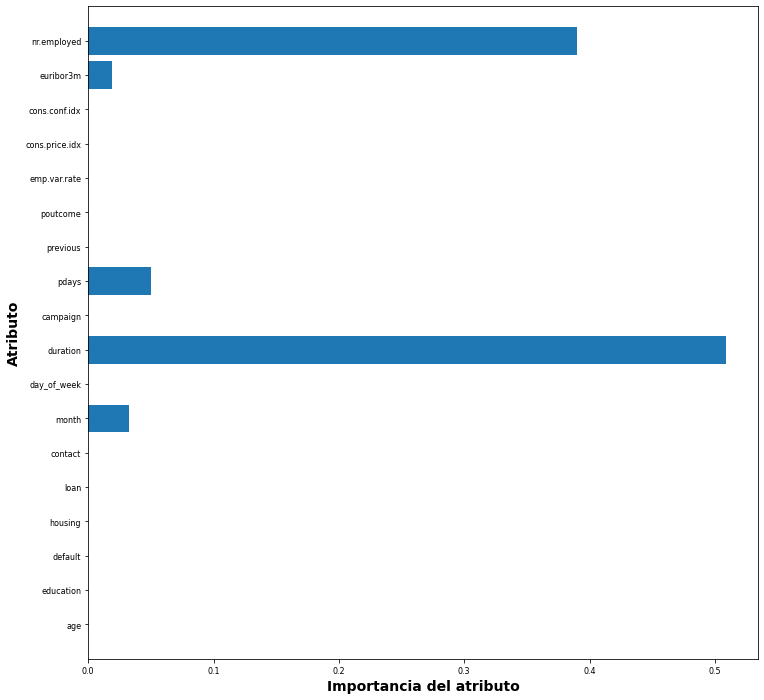

In [47]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Importancia del atributo")
    plt.ylabel("Atributo")
    plt.ylim(-1, n_features)

plt.rcParams.update({'font.size': 8})
plot_feature_importances(model1)

<font color='#3f68bf' size='4'>
El atributo más importante para este problema de clasificación es <b>"Duration"</b>.</br>
Los atributos que no contribuyen a la resolución de este problema son:

1.   cons.conf.idx
2.   cons.price.idx
3.   Elemento de lista
4.   emp.var.rate
5.   poutcome
6.   previous
7.   campaign
8.   day_of_week
9.   contact
10.   loan
11.   housing
12.   default
13.   education
14.   age

</font>














## Pregunta 5 
Entrene un naive Bayes usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`.

### Respuesta

Se entrena el modelo utilizando naive Bayes:


In [48]:
#Utilizando todas las variables

#entrenar el modelo
model2 = GaussianNB()
model2.fit(X_train, y_train)

#realizar la predicción
predicted = model2.predict(X_test)

#matriz de confusión
print(confusion_matrix(y_test, predicted))

#Accuracy
print("Score: {:.2f}".format(model2.score(X_test, y_test) ))

[[ 63  59]
 [137 977]]
Score: 0.84


<br><font color='#3f68bf' size='4'>El porcentaje de <b>clasificaciones correctas</b> del modelo es de <b>84%</b>.</font>


## Pregunta 6
Entrene un naive Bayes usando el conjunto de entrenamiento `X_train`, pero sólo utilizando los atributos que aparecen en el árbol obtenido en la pregunta 3. Entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. ¿Mejora el desempeño al comparar con lo obtenido en la pregunta 5?

### Respuesta

Se selccionan solo los atributos utilizados en el árbol de decisión:

In [49]:
#selecionar solo los atributos utilizadas en el arbol obtenido
Xtrain=X_train[['nr.employed','duration','euribor3m','pdays', 'month']]
Xtest=X_test[['nr.employed','duration','euribor3m','pdays', 'month']]

Se entrena el modelo y se obtiene el porcentaje de clasificaciones correctas:

In [50]:
#entrenar el modelo
model3 = GaussianNB()
model3.fit(Xtrain, y_train)

#realizar la predicción
predicted = model3.predict(Xtest)

#matriz de confusión
print(confusion_matrix(y_test, predicted))

#Accuracy
print("Score: {:.2f}".format(model3.score(Xtest, y_test) ))

[[  53   69]
 [  62 1052]]
Score: 0.89


<br><font color='#3f68bf' size='4'>Al utilizar solo los atributos que aparecen en el arbol de la pregunta 3 se verifica una mejora en el rendimiento del modelo. Utilizando todas los atributos del dataset el porcentaje de clasificaciones correctas es de <b>84%</b>, el cual se incrementa a <b>89%</b> usando solo los atributos definidos en al árbol de decisión.</font>


## Suerte!

In [51]:
print("¡Muchas gracias!")

¡Muchas gracias!


<font color='#3f68bf' size='5'><b>Aprendizaje Automático - Universidad Adolfo Ibañez</b></font>

Profesor: **Gonzalo Ruz**

Alumnos:

  1. **Angélica Leiva**
  2. **Jorge Navarro**
  3. **Erick Villarroel**
